In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

total_population = 5000
infectious = 1.
recovered = 0.
suspecitble = total_population - infectious - recovered

contact_rate = 0.4
recovery_rate = 0.01
tmax = 500
Nt = 500
t = np.linspace(0, tmax, Nt+1)


In [27]:
def derivative(X, t):
    S, I, R = X
    dotS = -contact_rate * S * I / total_population
    dotI = contact_rate * S * I / total_population - recovery_rate * I
    dotR = recovery_rate * I
    return np.array([dotS, dotI, dotR])

In [28]:
X0 = suspecitble, infectious, recovered  # Initial conditions vector
res = integrate.odeint(derivative, X0, t)
suspecitble, infectious, recovered = res.T
Seuil = 1 - 1 / (contact_rate / recovery_rate)
Seuil

0.975

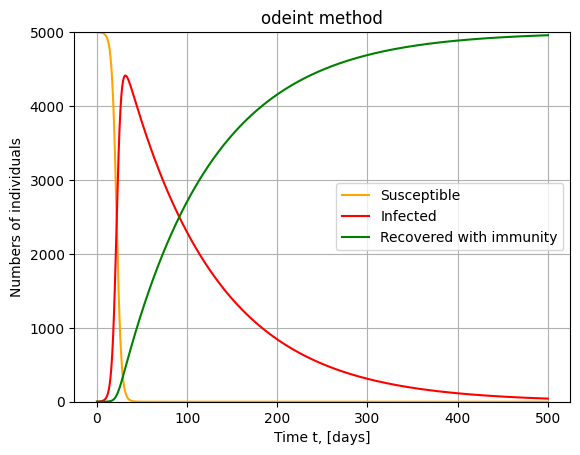

In [29]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, suspecitble, 'orange', label='Susceptible')
plt.plot(t, infectious, 'r', label='Infected')
plt.plot(t, recovered, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,total_population])
plt.legend()

plt.show();